In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Load the dataset to examine its structure
file_path = '/kaggle/input/snomed-ct-file/diabetes_dataset00.csv'
diabetes_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and check its structure
diabetes_data.head(), diabetes_data.info()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate features and target
X = diabetes_data.drop(columns=["Target"])
y = diabetes_data["Target"]

# Encode categorical features
categorical_columns = X.select_dtypes(include=["object"]).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    X[col] = label_encoders[col].fit_transform(X[col])

# Scale numerical features
numerical_columns = X.select_dtypes(include=["int64"]).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Encode target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, len(label_encoders), len(target_encoder.classes_)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train an SVM classifier
svm_model = SVC(kernel="rbf", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = svm_model.predict(X_test)
classification_report_output = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

print("Classification Report:\n", classification_report_output)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [4]:
!pip install pgmpy

In [2]:
# Install pgmpy if not already installed
# pip install pgmpy

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/snomed-ct-file/diabetes_dataset00.csv'  # Replace with your file path
diabetes_data = pd.read_csv(file_path)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_columns = diabetes_data.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    diabetes_data[column] = le.fit_transform(diabetes_data[column])
    label_encoders[column] = le

# Define the Bayesian Network structure (DAG)
model = BayesianNetwork([
    ('Genetic Markers', 'Target'),
    ('Autoantibodies', 'Target'),
    ('Family History', 'Target'),
    ('BMI', 'Insulin Levels'),
    ('Physical Activity', 'Insulin Levels'),
    ('Insulin Levels', 'Target'),
    ('Environmental Factors', 'Target')
])

# Train the model using Maximum Likelihood Estimation
model.fit(diabetes_data, estimator=MaximumLikelihoodEstimator)

# Validate the model
if model.check_model():
    print("The model is valid.")

# Perform inference
inference = VariableElimination(model)

# Example query: Probability of having a specific diabetes type given certain evidence
query_result = inference.query(variables=['Target'], evidence={'Genetic Markers': 1, 'BMI': 25})
print(query_result)

The model is valid.
+------------+---------------+
| Target     |   phi(Target) |
+============+===============+
| Target(0)  |        0.1007 |
+------------+---------------+
| Target(1)  |        0.0872 |
+------------+---------------+
| Target(2)  |        0.0863 |
+------------+---------------+
| Target(3)  |        0.0918 |
+------------+---------------+
| Target(4)  |        0.0263 |
+------------+---------------+
| Target(5)  |        0.0886 |
+------------+---------------+
| Target(6)  |        0.0938 |
+------------+---------------+
| Target(7)  |        0.0928 |
+------------+---------------+
| Target(8)  |        0.0409 |
+------------+---------------+
| Target(9)  |        0.0878 |
+------------+---------------+
| Target(10) |        0.1036 |
+------------+---------------+
| Target(11) |        0.0420 |
+------------+---------------+
| Target(12) |        0.0584 |
+------------+---------------+


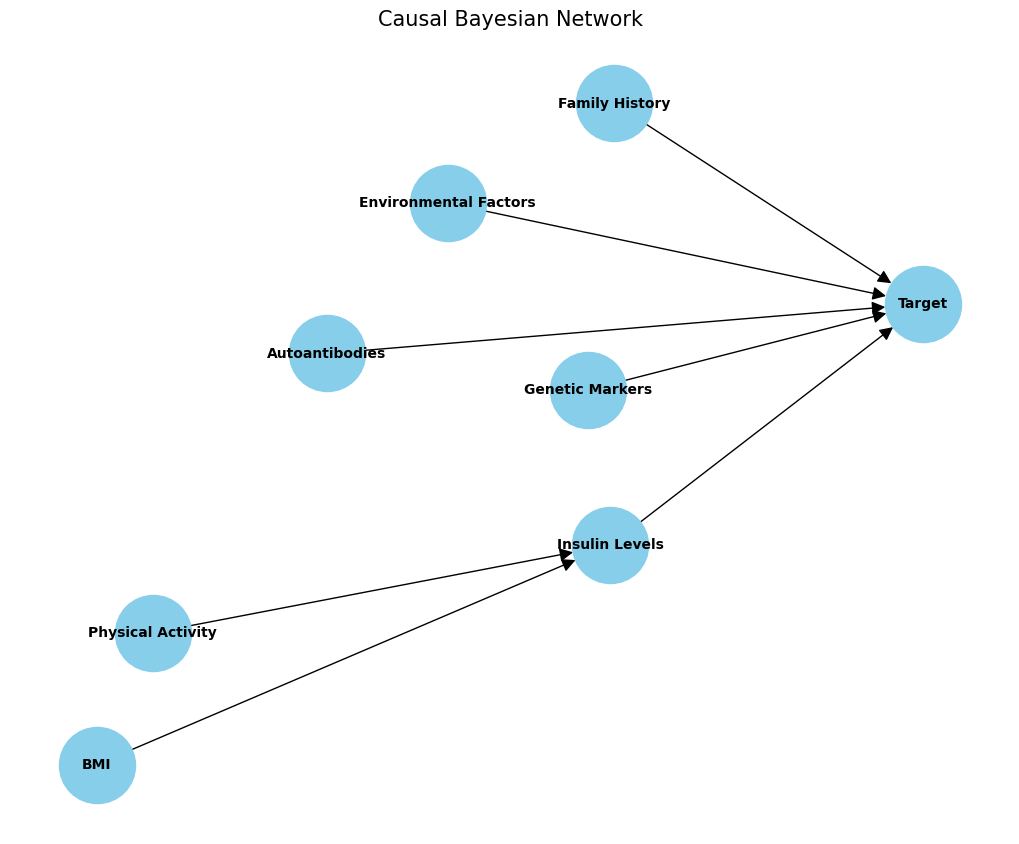

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

# Define the Bayesian Network structure (DAG)
model = BayesianNetwork([
    ('Genetic Markers', 'Target'),
    ('Autoantibodies', 'Target'),
    ('Family History', 'Target'),
    ('BMI', 'Insulin Levels'),
    ('Physical Activity', 'Insulin Levels'),
    ('Insulin Levels', 'Target'),
    ('Environmental Factors', 'Target')
])

# Plot the network using networkx
plt.figure(figsize=(10, 8))
G = nx.DiGraph()

# Add edges from the Bayesian Network
G.add_edges_from(model.edges())

# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20)
plt.title("Causal Bayesian Network", fontsize=15)
plt.show()

In [1]:
!pip install neo4j pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 5.7 MB/s eta 0:00:0000:01


In [4]:
import os
import pandas as pd
from neo4j import GraphDatabase

# File paths for SNOMED CT data
CONCEPTS_FILE = "/kaggle/input/extracted-snomed-ct/extracted snomed/diabetes_concepts.csv"
RELATIONSHIPS_FILE = "/kaggle/input/extracted-snomed-ct/extracted snomed/diabetes_relationships.csv"
DESCRIPTIONS_FILE = "/kaggle/input/extracted-snomed-ct/extracted snomed/diabetes_descriptions.csv"

# Neo4j connection details
NEO4J_URI = "neo4j+s://fa91728a.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "qnzz9DxfCPO2wAG9DJK14GdOI4C5ecyHA1gEWAjh5V4"

def load_file(file_path, delimiter=","):
    """
    Load a SNOMED CT file into a pandas DataFrame.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file does not exist: {file_path}")
    print(f"Loading file: {file_path}")
    return pd.read_csv(file_path, delimiter=delimiter)

def insert_concepts_to_neo4j(concepts_df, driver, batch_size=1000):
    """
    Insert SNOMED CT concepts into the Neo4j database in batches.
    """
    with driver.session() as session:
        for i in range(0, len(concepts_df), batch_size):
            batch = concepts_df.iloc[i:i+batch_size]
            query = """
            UNWIND $batch AS row
            MERGE (c:Concept {id: row.id})
            SET c.active = row.active, c.effectiveTime = row.effectiveTime, c.moduleId = row.moduleId
            """
            session.run(query, batch=batch.to_dict('records'))
    print("Concepts successfully inserted into Neo4j.")

def insert_relationships_to_neo4j(relationships_df, driver, batch_size=1000):
    """
    Insert SNOMED CT relationships into the Neo4j database in batches.
    """
    with driver.session() as session:
        for i in range(0, len(relationships_df), batch_size):
            batch = relationships_df.iloc[i:i+batch_size]
            query = """
            UNWIND $batch AS row
            MATCH (source:Concept {id: row.sourceId})
            MATCH (target:Concept {id: row.destinationId})
            MERGE (source)-[r:RELATION {typeId: row.typeId}]->(target)
            SET r.active = row.active, r.effectiveTime = row.effectiveTime
            """
            session.run(query, batch=batch.to_dict('records'))
    print("Relationships successfully inserted into Neo4j.")

def insert_descriptions_to_neo4j(descriptions_df, driver, batch_size=1000):
    """
    Insert SNOMED CT descriptions into the Neo4j database in batches.
    """
    with driver.session() as session:
        for i in range(0, len(descriptions_df), batch_size):
            batch = descriptions_df.iloc[i:i+batch_size]
            query = """
            UNWIND $batch AS row
            MATCH (c:Concept {id: row.conceptId})
            SET c.description = row.term, c.languageCode = row.languageCodes
            """
            session.run(query, batch=batch.to_dict('records'))
    print("Descriptions successfully inserted into Neo4j.")

def main():
    try:
        # Load the data files
        concepts_df = load_file(CONCEPTS_FILE)
        relationships_df = load_file(RELATIONSHIPS_FILE)
        descriptions_df = load_file(DESCRIPTIONS_FILE)

        # Connect to Neo4j
        driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
        print("Connected to Neo4j.")

        # Insert data into Neo4j
        insert_concepts_to_neo4j(concepts_df, driver)
        insert_relationships_to_neo4j(relationships_df, driver)
        insert_descriptions_to_neo4j(descriptions_df, driver)

    except FileNotFoundError as e:
        print(f"File not found error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    finally:
        if 'driver' in locals():
            driver.close()
            print("Neo4j connection closed.")

if __name__ == "__main__":
    main()


Loading file: /kaggle/input/extracted-snomed-ct/extracted snomed/diabetes_concepts.csv
Loading file: /kaggle/input/extracted-snomed-ct/extracted snomed/diabetes_relationships.csv
Loading file: /kaggle/input/extracted-snomed-ct/extracted snomed/diabetes_descriptions.csv
Connected to Neo4j.
Concepts successfully inserted into Neo4j.
Relationships successfully inserted into Neo4j.
Descriptions successfully inserted into Neo4j.
Neo4j connection closed.


In [1]:
import pandas as pd

DESCRIPTIONS_FILE = "/kaggle/input/snomed-ct/SnomedCT_InternationalRF2_PRODUCTION_20241201T120000Z/Snapshot/Terminology/sct2_Description_Snapshot-en_INT_20241201.txt"

# Load Description file
descriptions_df = pd.read_csv(DESCRIPTIONS_FILE, delimiter='\t')

# Filter for terms related to diabetes
diabetes_descriptions = descriptions_df[
    descriptions_df['term'].str.contains('diabetes', case=False, na=False)
]

print(diabetes_descriptions)

diabetes_concept_ids = diabetes_descriptions['conceptId'].unique()
print(diabetes_concept_ids)

CONCEPTS_FILE = "/kaggle/input/snomed-ct/SnomedCT_InternationalRF2_PRODUCTION_20241201T120000Z/Snapshot/Terminology/sct2_Concept_Snapshot_INT_20241201.txt"

# Load Concept file
concepts_df = pd.read_csv(CONCEPTS_FILE, delimiter='\t')

# Filter for diabetes-related concepts
diabetes_concepts = concepts_df[concepts_df['id'].isin(diabetes_concept_ids)]
print(diabetes_concepts)

RELATIONSHIPS_FILE = "/kaggle/input/snomed-ct/SnomedCT_InternationalRF2_PRODUCTION_20241201T120000Z/Snapshot/Terminology/sct2_Relationship_Snapshot_INT_20241201.txt"

# Load Relationship file
relationships_df = pd.read_csv(RELATIONSHIPS_FILE, delimiter='\t')

# Filter for relationships involving diabetes concepts
diabetes_relationships = relationships_df[
    relationships_df['sourceId'].isin(diabetes_concept_ids) |
    relationships_df['destinationId'].isin(diabetes_concept_ids)
]
print(diabetes_relationships)


                      id  effectiveTime  active            moduleId  \
192               300015       20170731       1  900000000000207008   
2327             2724015       20170731       1  900000000000207008   
5186             5649018       20170731       1  900000000000207008   
7744             8256017       20020131       1  900000000000207008   
7745             8257014       20020131       0  900000000000207008   
...                  ...            ...     ...                 ...   
1640874   12411000119119       20130731       1  900000000000207008   
1642183  612111000124115       20210731       1  900000000000207008   
1644020  717691000124111       20230731       1  900000000000207008   
1644021  717701000124111       20230731       1  900000000000207008   
1644302  739941000124111       20210731       1  900000000000207008   

               conceptId languageCode              typeId  \
192            127012008           en  900000000000013009   
2327              982001 

In [3]:
diabetes_concepts.to_csv("diabetes_concepts.csv", index=False)
diabetes_relationships.to_csv("diabetes_relationships.csv", index=False)
diabetes_descriptions.to_csv("diabetes_descriptions.csv", index=False)
